<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/equalise_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

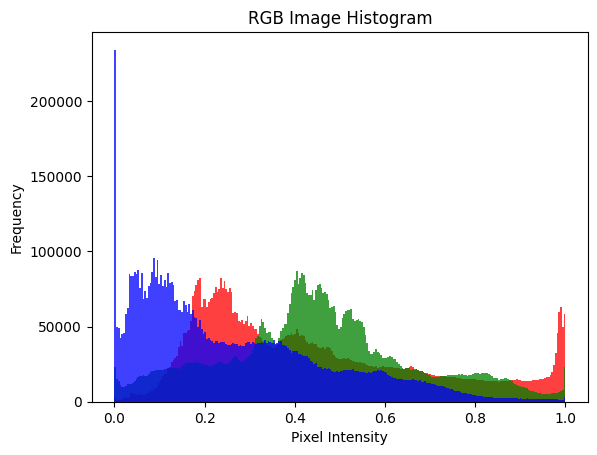

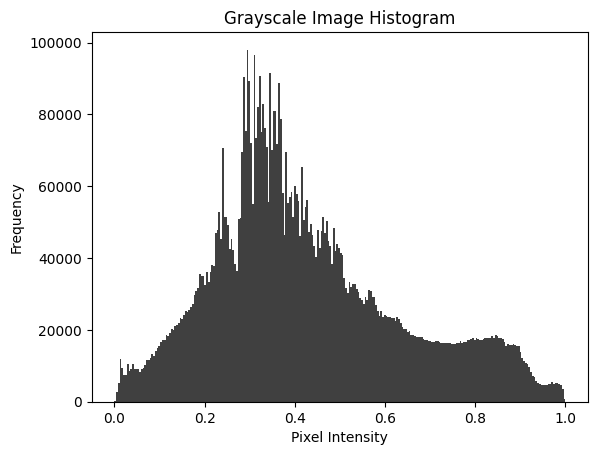

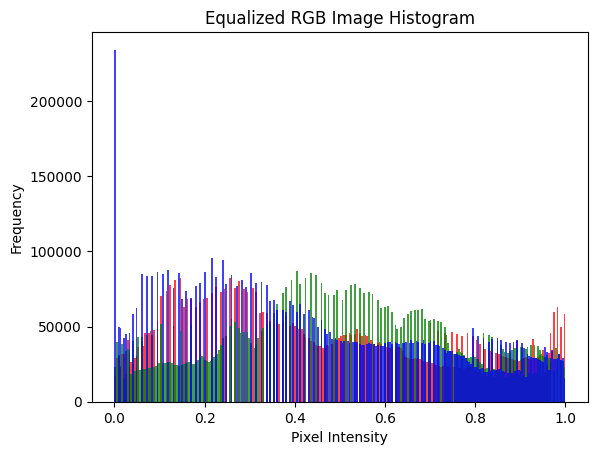

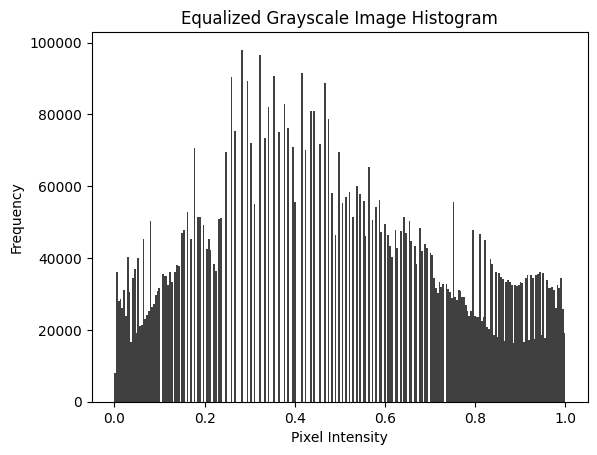

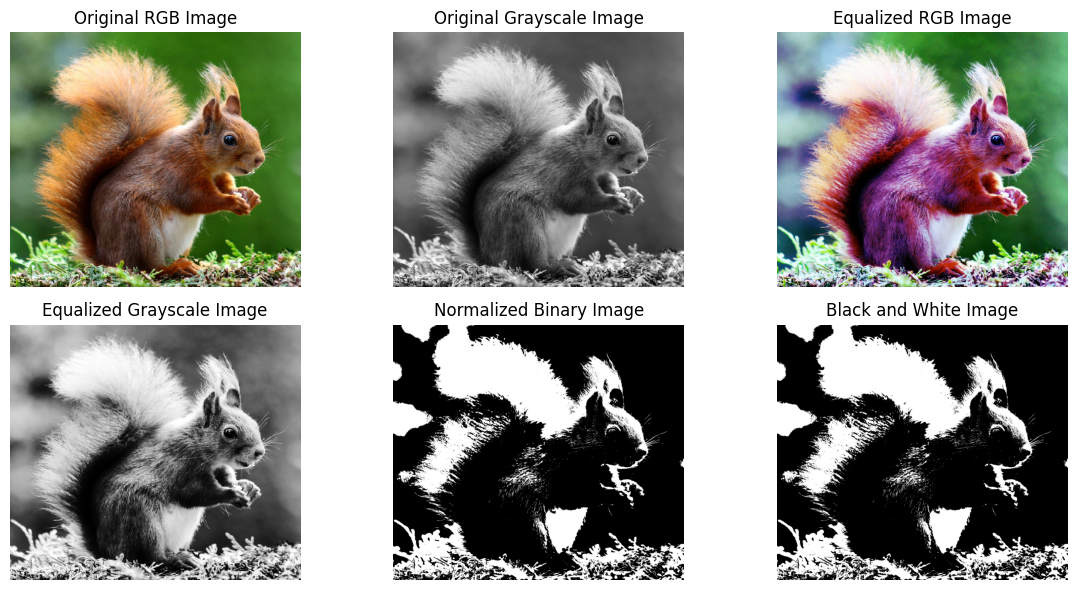

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to check if an image is normalized
def is_normalized(image):
    return np.max(image) <= 1.0

# Function to normalize an image
def normalize_image(image):
    return image / 255.0

# Function to plot histograms
def plot_histogram(image, title):
    if len(image.shape) == 2:  # Grayscale or B/W image
        plt.hist(image.ravel(), bins=256, range=(0, 1), color='black', alpha=0.75)
    else:  # RGB image
        colors = ('r', 'g', 'b')
        for i, color in enumerate(colors):
            plt.hist(image[:, :, i].ravel(), bins=256, range=(0, 1), color=color, alpha=0.75)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Function to apply histogram equalization
def apply_histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale or B/W image
        return cv2.equalizeHist(image)
    else:  # RGB image
        channels = cv2.split(image)
        equalized_channels = [cv2.equalizeHist(channel) for channel in channels]
        return cv2.merge(equalized_channels)

# Function to normalize binary image
def normalize_binary_image(image):
    return (image / 255.0).astype(np.float32)

# Function to convert binary image to black and white
def binary_to_black_white(image):
    return (image * 255).astype(np.uint8)

# Load an image
image_path = '/content/animal.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Check if the image is normalized
if not is_normalized(image_rgb):
    image_rgb = normalize_image(image_rgb)
    image_gray = normalize_image(image_gray)

# Plot histograms
plot_histogram(image_rgb, 'RGB Image Histogram')
plot_histogram(image_gray, 'Grayscale Image Histogram')

# Apply histogram equalization
equalized_rgb = apply_histogram_equalization((image_rgb * 255).astype(np.uint8))
equalized_gray = apply_histogram_equalization((image_gray * 255).astype(np.uint8))

# Plot histograms after equalization
plot_histogram(equalized_rgb / 255.0, 'Equalized RGB Image Histogram')
plot_histogram(equalized_gray / 255.0, 'Equalized Grayscale Image Histogram')

# Normalize binary image
binary_image = cv2.threshold((image_gray * 255).astype(np.uint8), 127, 255, cv2.THRESH_BINARY)[1]
normalized_binary = normalize_binary_image(binary_image)

# Convert binary image to black and white
black_white_image = binary_to_black_white(normalized_binary)

# Display images
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(equalized_rgb)
plt.title('Equalized RGB Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(equalized_gray, cmap='gray')
plt.title('Equalized Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(normalized_binary, cmap='gray')
plt.title('Normalized Binary Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(black_white_image, cmap='gray')
plt.title('Black and White Image')
plt.axis('off')

plt.tight_layout()
plt.show()